<div style="text-align: center;">
    <span style="font-size: 85px; font-weight: bold;">Logistic Regression</span>
</div>



<span style="font-size: 24px; font-weight: bold;">In linear Regression:</span>


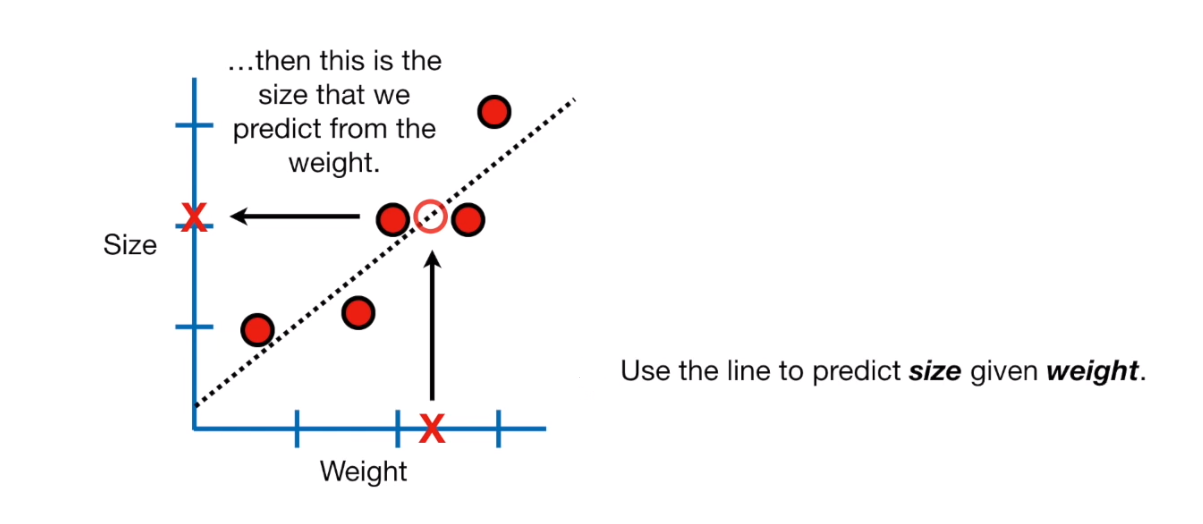

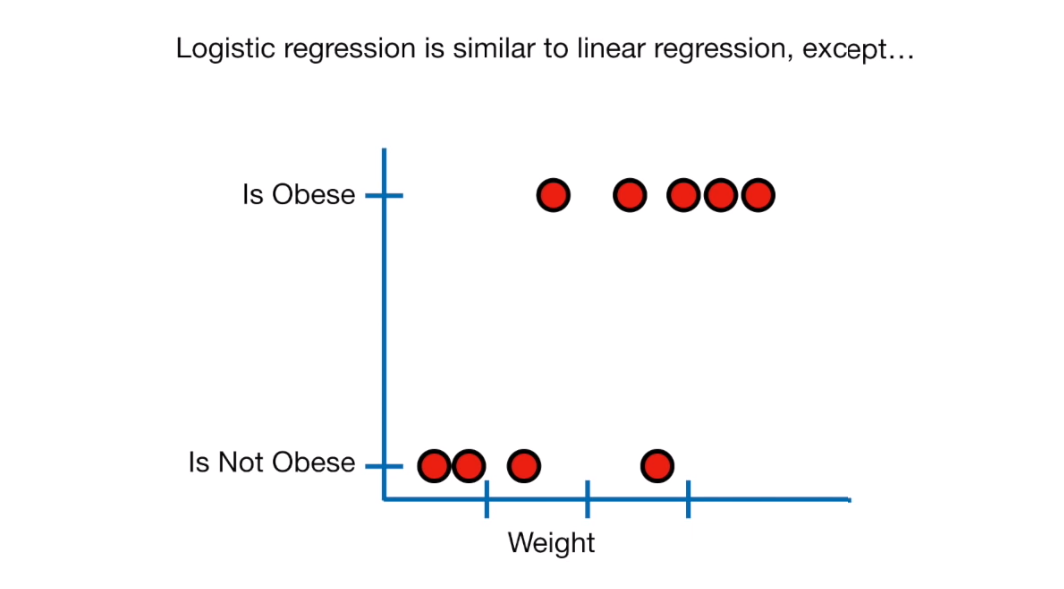

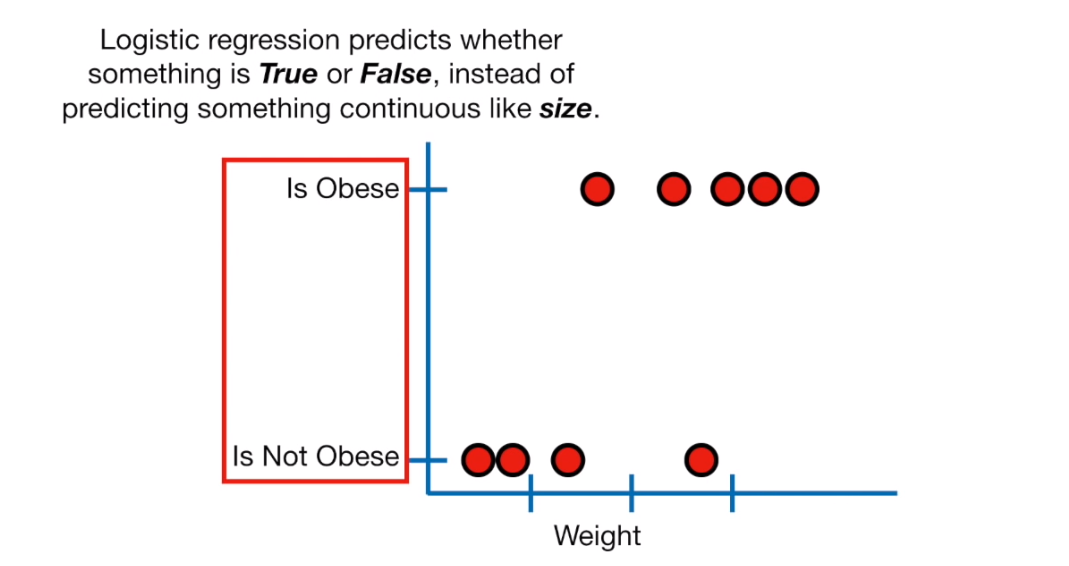

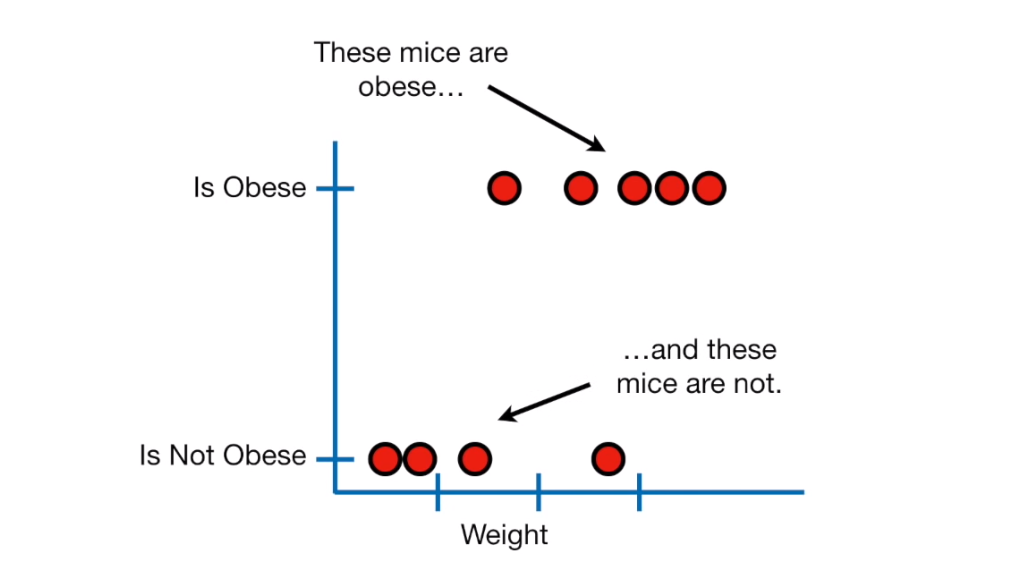

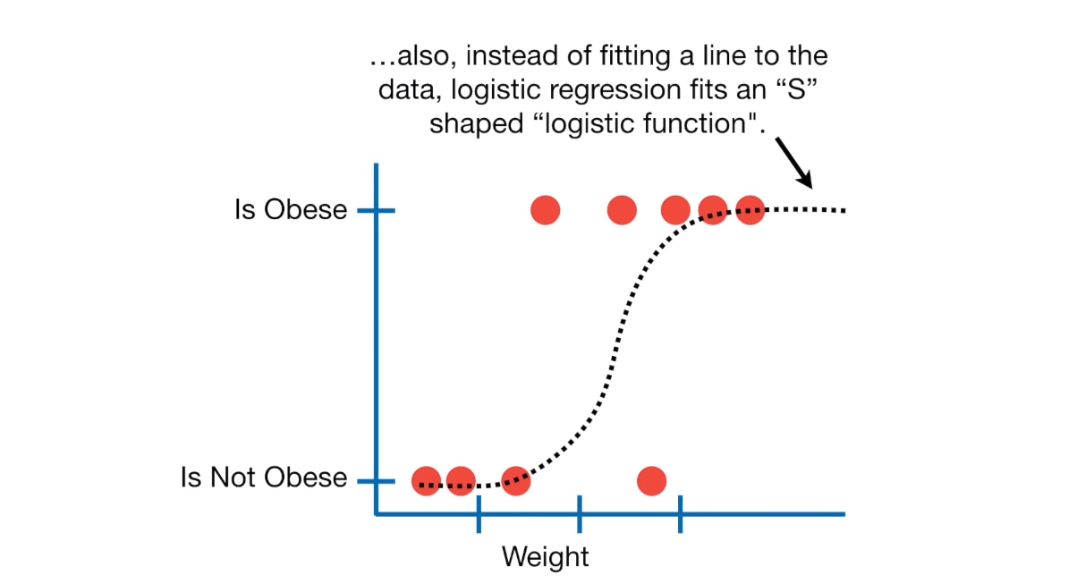

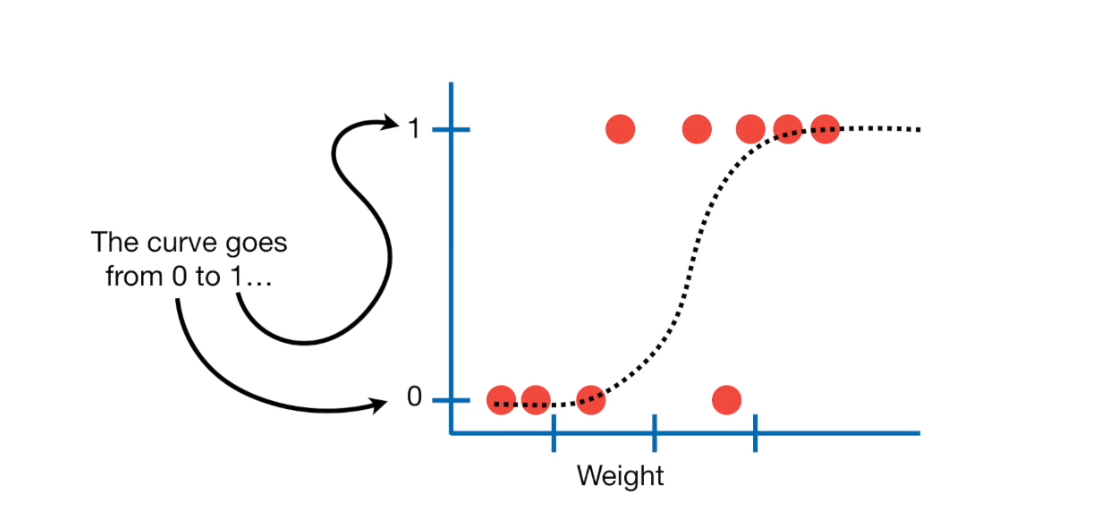

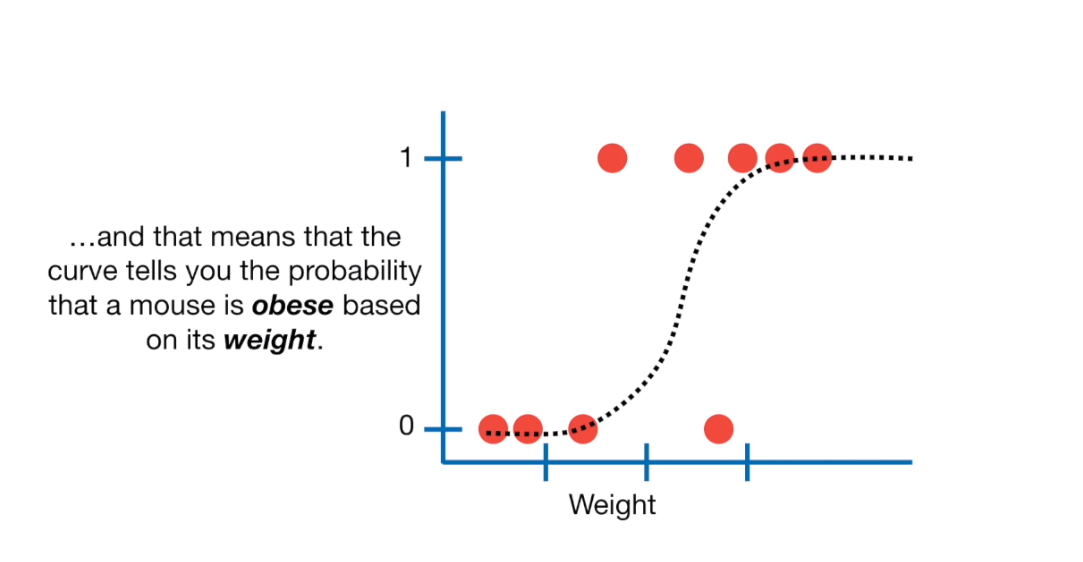

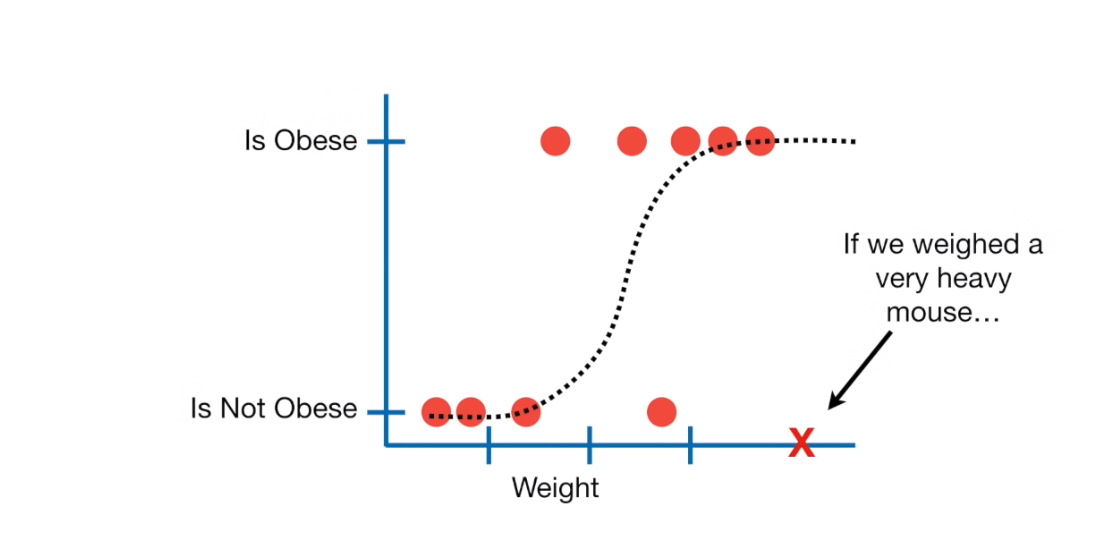

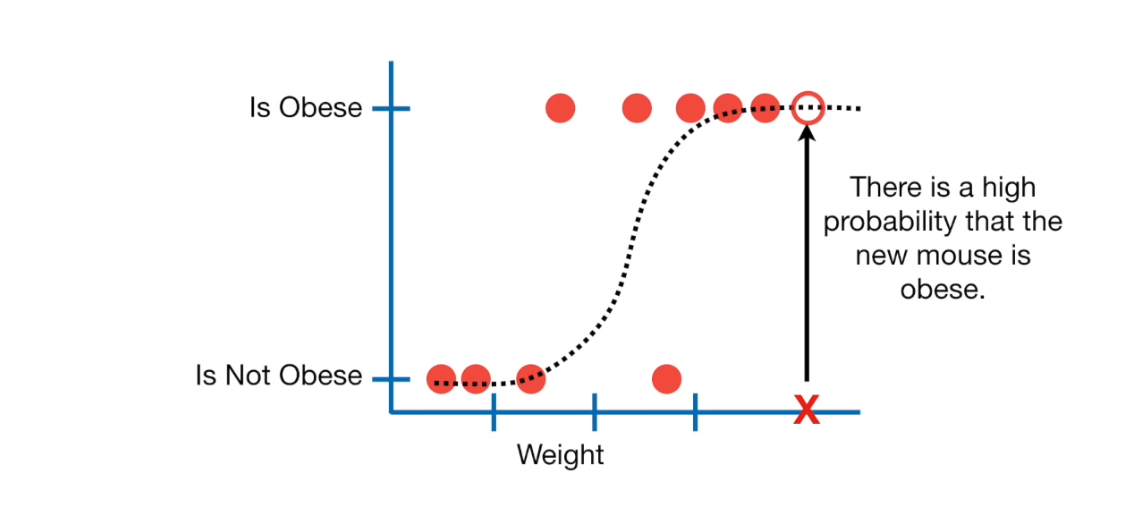

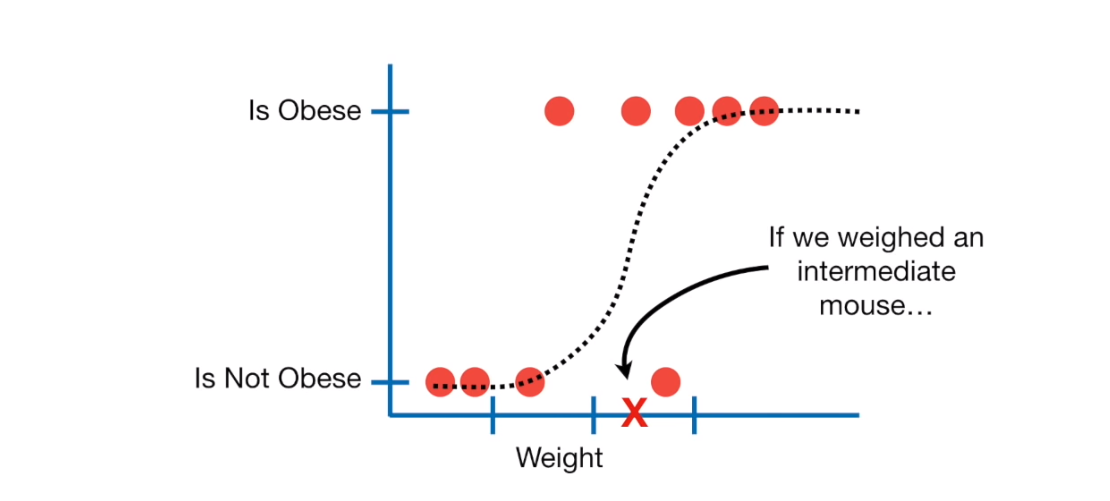

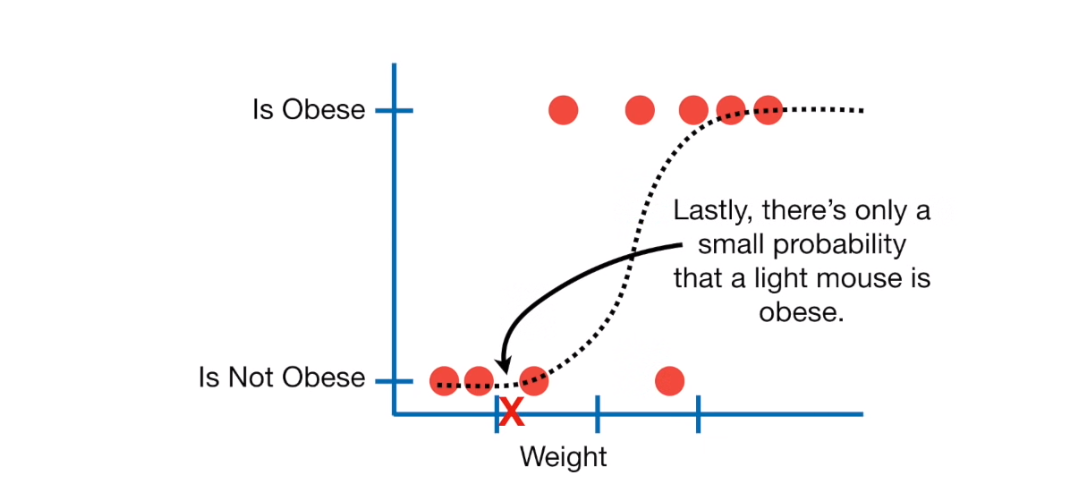

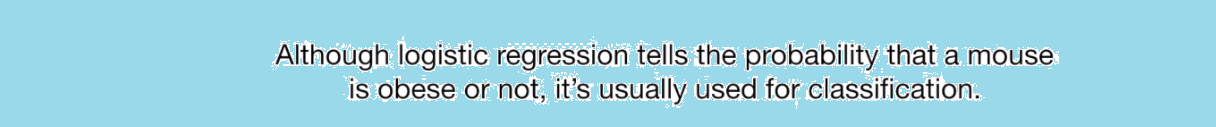

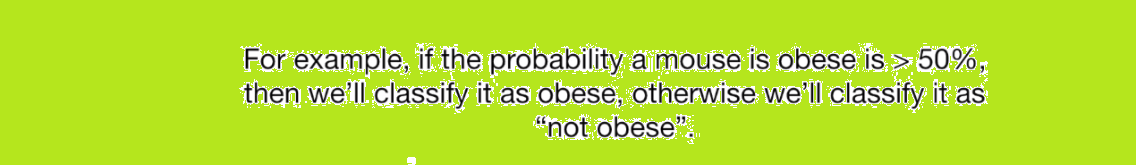

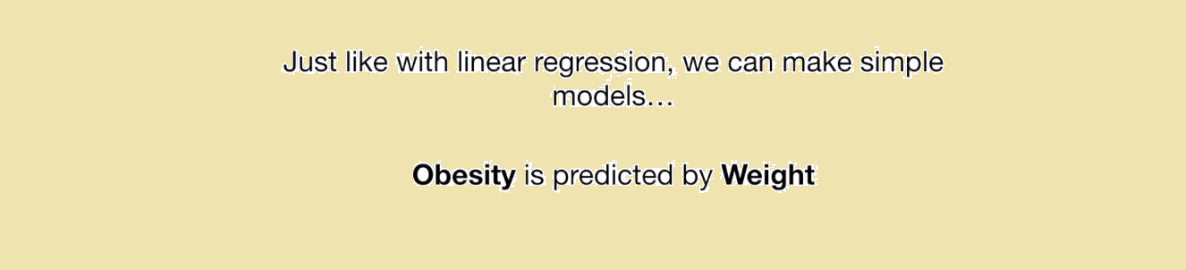

<span style="font-size: 24px; font-weight: bold;">Or more complicated model:</span>


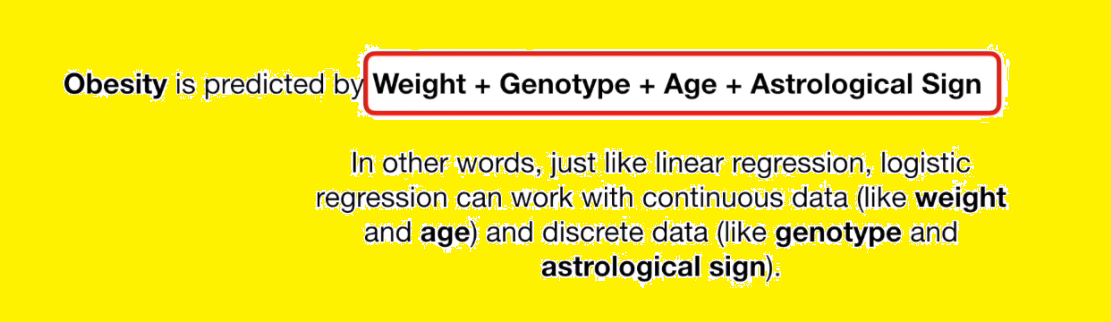

<span style="font-size: 24px; font-weight: bold;">Logistic Regression Vs linear Regression:</span>

Linear and Logistic regression are the most basic form of regression which are commonly used. The 
essential difference between these two is that Logistic regression is used when the dependent variable 
is binary. In contrast, Linear regression is used when the dependent variable is continuous, and the 
nature of the regression line is linear

<span style="font-size: 24px; font-weight: bold;">Example:</span>


In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and Explore the data
dataset  = pd.read_csv('/kaggle/input/suv-data/suv_data.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
# input (features)
x = dataset.iloc[:, [2, 3]].values
  
# output (target)
y = dataset.iloc[:, 4].values

Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model.  

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)


Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space. 

In [34]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


Here once see that Age and Estimated salary features values are scaled and now there in the -1 to 1. Hence, each feature will contribute equally to decision making i.e. finalizing the hypothesis. 

Finally, we are training our Logistic Regression model. 

In [36]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

After training the model, it is time to use it to do predictions on testing data. 

In [37]:
y_pred = classifier.predict(xtest)

Let’s test the performance of our model – Confusion Matrix 

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


Out of 100 : 

True Positive + True Negative = 65 + 24 

False Positive + False Negative = 3 + 8

Performance measure – Accuracy 

In [40]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


Visualizing the performance of our model. 

/tmp/ipykernel_32/2825972194.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


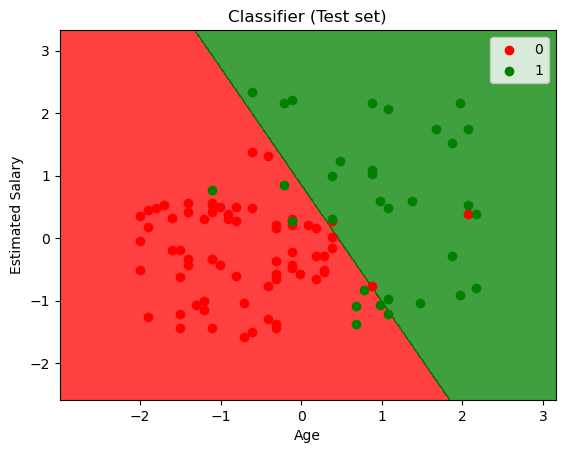

In [41]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
